[31. 下一个排列](https://leetcode-cn.com/problems/next-permutation/description/)
实现获取下一个排列的函数，算法需要将给定数字序列重新排列成字典序中下一个更大的排列。

如果不存在下一个更大的排列，则将数字重新排列成最小的排列（即升序排列）。

必须原地修改，只允许使用额外常数空间。

以下是一些例子，输入位于左侧列，其相应输出位于右侧列。
1,2,3 → 1,3,2
3,2,1 → 1,2,3
1,1,5 → 1,5,1

Approach 2: Single Pass Approach
Algorithm

First, we observe that for any given sequence that is in descending order, no next larger permutation is possible. For example, no next permutation is possible for the following array: [9, 5, 4, 3, 1]

We need to find the first pair of two successive numbers a[i]a[i] and a[i-1]a[i−1], from the right, which satisfy a[i] &gt; a[i-1]a[i]>a[i−1]. Now, no rearrangements to the right of a[i-1]a[i−1] can create a larger permutation since that subarray consists of numbers in descending order. Thus, we need to rearrange the numbers to the right of a[i-1]a[i−1] including itself.

Now, what kind of rearrangement will produce the next larger number? We want to create the permutation just larger than the current one. Therefore, we need to replace the number a[i-1]a[i−1] with the number which is just larger than itself among the numbers lying to its right section, say a[j]a[j].
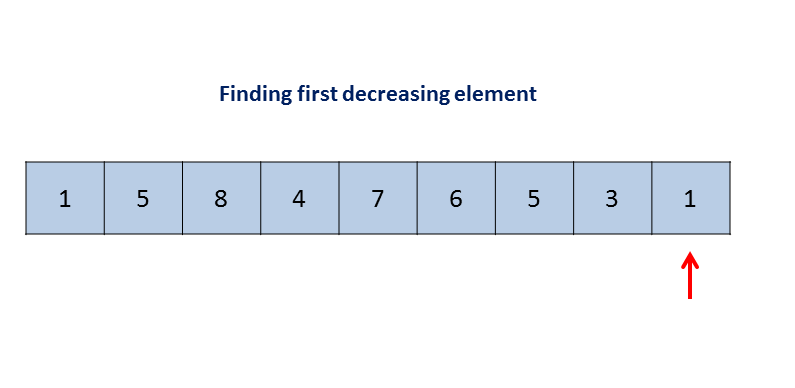

We swap the numbers a[i-1]a[i−1] and a[j]a[j]. We now have the correct number at index i-1i−1. But still the current permutation isn't the permutation that we are looking for. We need the smallest permutation that can be formed by using the numbers only to the right of a[i-1]a[i−1]. Therefore, we need to place those numbers in ascending order to get their smallest permutation.

But, recall that while scanning the numbers from the right, we simply kept decrementing the index until we found the pair a[i]a[i] and a[i-1]a[i−1] where, a[i] &gt; a[i-1]a[i]>a[i−1]. Thus, all numbers to the right of a[i-1]a[i−1] were already sorted in descending order. Furthermore, swapping a[i-1]a[i−1] and a[j]a[j] didn't change that order. Therefore, we simply need to reverse the numbers following a[i-1]a[i−1] to get the next smallest lexicographic permutation.

The following animation will make things clearer:

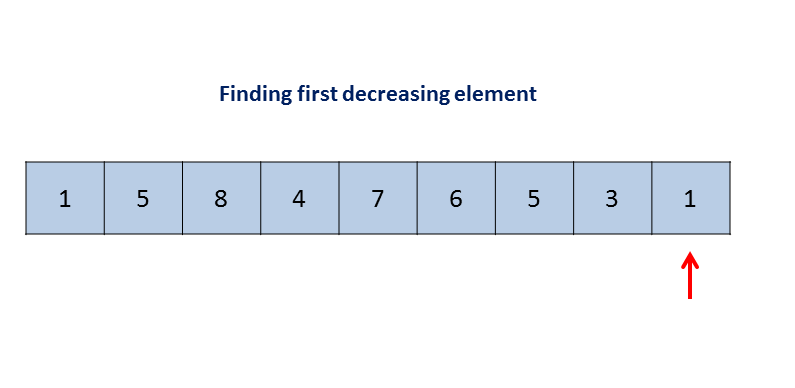

In [35]:
class Solution:
    def nextPermutation(self, nums):
        i = len(nums) -2
        while (i >= 0 and nums[i + 1] <= nums[i]):
            i -= 1
        if i >= 0:
            j = len(nums) -1
            while j >= 0 and nums[j] <= nums[i]:
                j -= 1
            self.swap(nums, i, j)
        self.reverse(nums, i+1)
    def reverse(self, nums, start):
        i, j = start, len(nums) -1
        while i < j:
            self.swap(nums, i, j)
            i += 1
            j -= 1
    def swap(self, nums, i, j):
        tmp = nums[i]
        nums[i] = nums[j]
        nums[j] = tmp

In [37]:
class Solution:
    def nextPermutation(self, nums):
        i = len(nums) -2
        while (i >= 0 and nums[i + 1] <= nums[i]):
            i -= 1
        if i >= 0:
            j = len(nums) -1
            while j >= 0 and nums[j] <= nums[i]:
                j -= 1
            self.swap(nums, i, j)
        self.reverse(nums, i+1)
    def reverse(self, nums, start):
        i, j = start, len(nums) -1
        while i < j:
            self.swap(nums, i, j)
            i += 1
            j -= 1
    def swap(self, nums, i, j):
        nums[i], nums[j] = nums[j], nums[i]
        

In [40]:
nums = [3,1,2,4]
S = Solution()
S.nextPermutation(nums)
nums

[3, 1, 4, 2]